# **1. Crawl Top 20 reviews & write CSV**

### **Importing necessary librararies and url**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import time
import random

### **Request page and parse with BeautifulSoup**

In [ ]:
url = 'https://www.rottentomatoes.com/m/the_roses/reviews'

#Make a GET request to the target URL to get the raw HTML Data
response = requests.get(url)
html = response.text

#Use beautifulSoup to parse hTML
soup = BeautifulSoup(html, 'html.parser')

### **Locate review blocks**

In [ ]:
reviews = soup.find_all('div', class_ = 'review-row')
print(len(reviews))

20


### **For debugging, test on one review first- Scrape review details**

In [ ]:
review_1 = reviews[0]
print(review_1)

<div class="review-row" data-qa="review-item" tabindex="0">
<div class="review-data">
<img class="critic-picture" src="https://resizing.flixster.com/P2-SQI6_fbyn4QsK73ELShgku3E=/fit-in/50x50/v2/https://resizing.flixster.com/h90o4_ISF4XAPYZnFemJfh1zp8c=/128x128/v1.YzsyNzk0O2c7MjAzODU7MjA0ODsxNTA7MTUw"/>
<div class="reviewer-name-and-publication">
<a class="display-name" data-qa="review-critic-link" href="/critics/armond-white">
                        Armond White
                    </a>
<a class="publication" data-qa="review-publication" href="/critics/source/995">
                        National Review
                    </a>
</div>
<score-icon-critics sentiment="NEGATIVE" size="4"></score-icon-critics>
</div>
<div class="review-text-container">
<p class="review-text" data-qa="review-quote">None of the couple’s success, failure, or fame reflects the unsatisfying ups and downs of these times. Roach and McNamara cheat us of understanding ourselves. The Roses plays like a hoax. Hollyw

In [ ]:
#get reviewer name, Inspect user name and find its class
username = review_1.find('a', class_='display-name').get_text(strip= True)
print(username)

Armond White


In [ ]:
#get publication name. inspect publication and find its class
publication = review_1.find('a', class_='publication').get_text(strip= True)
print(publication)

National Review


In [ ]:
#extract review_content
review_content = review_1.find('p', class_='review-text').get_text(strip= True)
print(review_content)

None of the couple’s success, failure, or fame reflects the unsatisfying ups and downs of these times. Roach and McNamara cheat us of understanding ourselves. The Roses plays like a hoax. Hollywood can’t go on making movies like this.


In [ ]:
#extract date of review ; same use inspect to find that it is a span class
review_date = review_1.find('span', {'data-qa': 'review-date'}).get_text(strip= True)
print(review_date)

Sep 10, 2025


In [ ]:
#for some reviews, it may be original score as well, let's extract it
#find the <p> tag
score_tag = soup.find("p", class_="original-score-and-url").get_text(strip = True)

import re
match = re.search(r"Original Score:\s*([^|]+)", score_tag)
score = match.group(1).strip() if match else None
print(score)

None


In [ ]:
#bundle one review
single_review = [username, publication, review_date, review_content, score]
print(single_review)

['Armond White', 'National Review', 'Sep 10, 2025', 'None of the couple’s success, failure, or fame reflects the unsatisfying ups and downs of these times. Roach and McNamara cheat us of understanding ourselves. The Roses plays like a hoax. Hollywood can’t go on making movies like this.', None]


### **Scrape top 20 reviews into a list**

In [ ]:
single_page_review = []

# Slice [:20] to ensure “Top 20”
for review in reviews[:20]:
    username = review.find('a', class_='display-name').get_text(strip=True)
    publication = review.find('a', class_='publication').get_text(strip=True)
    review_date = review.find('span', {'data-qa':'review-date'}).get_text(strip=True)
    review_content = review.find('p', class_='review-text').get_text(strip=True)

    score = None
    score_tag = review.find("p", class_="original-score-and-url")
    if score_tag:
        m = re.search(r"Original Score:\s*([^|]+)", score_tag.get_text(strip=True))
        score = m.group(1).strip() if m else None

    single_review = [username, publication, review_date, review_content, score]
    single_page_review.append(single_review)


print(*single_page_review, sep="\n")

['Armond White', 'National Review', 'Sep 10, 2025', 'None of the couple’s success, failure, or fame reflects the unsatisfying ups and downs of these times. Roach and McNamara cheat us of understanding ourselves. The Roses plays like a hoax. Hollywood can’t go on making movies like this.', None]
['Neely Swanson', 'Beverly Hills Courier', 'Sep 10, 2025', 'The Roses is a very good movie, but what makes it exceptional are the two leads: Benedict Cumberbatch as Theo and Olivia Coleman as Ivy.', None]
['Sarah Vincent', 'Sarah G Vincent Views', 'Sep 8, 2025', 'It is like going to a party and ending on a down note. It is so strange to laugh for almost the entire movie then to leave as silent as the grave.', None]
['Susan Granger', 'SSG Syndicate', 'Sep 7, 2025', "How many ways can a critic warn: 'This picture is absolutely awful'? Ill-conceived and ineptly scripted, the bickering never stops. Resentment is redolent. And - bottom line - it's not funny.", '3/10']
['Kelechi Ehenulo', 'Movie Marke

In [ ]:
# build df from the 20 scraped rows exactly like L1.6
df.head(5)


,user_name,publication,review_date,review,rating,review_expanded,tokens_raw,misspellings,tokens_clean
0,Armond White,National Review,"Sep 10, 2025","None of the couple’s success, failure, or fame...",NaN,"None of the couple’s success, failure, or fame...","[None, of, the, couple, ’, s, success, ,, fail...",[],"[none, couple, success, failure, fame, reflect..."
1,Neely Swanson,Beverly Hills Courier,"Sep 10, 2025","The Roses is a very good movie, but what makes...",NaN,"The Roses is a very good movie, but what makes...","[The, Roses, is, a, very, good, movie, ,, but,...","[cumberbatch, theo]","[roses, good, movie, makes, exceptional, two, ..."
2,Sarah Vincent,Sarah G Vincent Views,"Sep 8, 2025",It is like going to a party and ending on a do...,NaN,It is like going to a party and ending on a do...,"[It, is, like, going, to, a, party, and, endin...",[],"[like, going, party, ending, note, strange, la..."
3,Susan Granger,SSG Syndicate,"Sep 7, 2025",How many ways can a critic warn: 'This picture...,3/10,How many ways can a critic warn: 'This picture...,"[How, many, ways, can, a, critic, warn, :, ', ...",[],"[many, ways, critic, warn, picture, absolutely..."
4,Kelechi Ehenulo,Movie Marker,"Sep 6, 2025",Instead of the sinking ship IP remake this cou...,3/5,Instead of the sinking ship IP remake this cou...,"[Instead, of, the, sinking, ship, IP, remake, ...",[ip],"[instead, sinking, ship, ip, remake, could, ea..."


### **Save to CSV**

In [ ]:
df = pd.DataFrame(
    single_page_review,
    columns=["user_name", "publication", "review_date", "review", "rating"]
)
df.to_csv("the_roses_top20_reviews.csv", index=False)
df.head(3)


,user_name,publication,review_date,review,rating
0,Armond White,National Review,"Sep 10, 2025","None of the couple’s success, failure, or fame...",None
1,Neely Swanson,Beverly Hills Courier,"Sep 10, 2025","The Roses is a very good movie, but what makes...",None
2,Sarah Vincent,Sarah G Vincent Views,"Sep 8, 2025",It is like going to a party and ending on a do...,None


# **2. Contraction expansion, Tokenization, Misspellings**

### **Installing necessary libraries + NLTK download**

In [ ]:
!pip install contractions pyspellchecker -q
import nltk
nltk.download('punkt'); nltk.download('stopwords');


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Load CSV and Expand contractions**

In [ ]:
import pandas as pd
df = pd.read_csv('the_roses_top20_reviews.csv')
df.head(2)


,user_name,publication,review_date,review,rating
0,Armond White,National Review,"Sep 10, 2025","None of the couple’s success, failure, or fame...",NaN
1,Neely Swanson,Beverly Hills Courier,"Sep 10, 2025","The Roses is a very good movie, but what makes...",NaN


## **Contraction expansion before Tokenization**

In [ ]:
import contractions
import pandas as pd

def expand_contractions(text):
    if pd.isna(text):
        return ""
    words = []
    for w in str(text).split():
        words.append(contractions.fix(w))
    return ' '.join(words)

df['review_expanded'] = df['review'].apply(expand_contractions)
df[['review','review_expanded']].head(2)


,review,review_expanded
0,"None of the couple’s success, failure, or fame...","None of the couple’s success, failure, or fame..."
1,"The Roses is a very good movie, but what makes...","The Roses is a very good movie, but what makes..."


## **Tokenize**

In [ ]:
from nltk.tokenize import wordpunct_tokenize

df['tokens_raw'] = df['review_expanded'].apply(lambda t: wordpunct_tokenize(t))
df[['user_name','tokens_raw']].head(3)


,user_name,tokens_raw
0,Armond White,"[None, of, the, couple, ’, s, success, ,, fail..."
1,Neely Swanson,"[The, Roses, is, a, very, good, movie, ,, but,..."
2,Sarah Vincent,"[It, is, like, going, to, a, party, and, endin..."


## **Misspelling with Pyspellchecker**

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

def list_misspellings(tokens):
    # keep alphabetic tokens to avoid punctuation/nums
    toks = [w for w in tokens if w.isalpha()]
    # pyspellchecker expects lowercased tokens
    toks = [w.lower() for w in toks]
    return sorted(spell.unknown(toks))

df['misspellings'] = df['tokens_raw'].apply(list_misspellings)
df[['user_name','misspellings']].head(10)


,user_name,misspellings
0,Armond White,[]
1,Neely Swanson,"[cumberbatch, theo]"
2,Sarah Vincent,[]
3,Susan Granger,[]
4,Kelechi Ehenulo,[ip]
5,Whang Yee Ling,[romcom]
6,Jared Rasic,"[colman, cumberbatch]"
7,Stephen Romei,"[colman, cumberbatch, devito]"
8,Maxwell Rabb,[]
9,Josh Larsen,"[colman, cumberbatch]"


# **4. Text Normalization- Top 10 tokens**

### **Define Preprocessing**

In [ ]:
# 1) Preprocessing function
from nltk.corpus import stopwords
from string import punctuation

def preprocessing(tokens):
    # lowercasing
    tokens = [t.lower() for t in tokens]
    # remove digits
    tokens = [t for t in tokens if not t.isdigit()]
    # remove punctuations
    tokens = [t for t in tokens if t not in punctuation]
    # remove stopwords
    mystops = set(stopwords.words("english"))
    tokens = [t for t in tokens if t not in mystops]
    # remove tokens with length < 2
    tokens = [t for t in tokens if len(t) >= 2]
    return tokens


### **Apply to each review**

In [ ]:
# 2) Apply to EACH review
from nltk.tokenize import wordpunct_tokenize

# If you don't already have tokens_raw from Q2, create them now from the expanded text
if 'tokens_raw' not in df.columns:
    df['review_expanded'] = df['review_expanded'].fillna('').astype(str)
    df['tokens_raw'] = df['review_expanded'].apply(wordpunct_tokenize)

df['tokens_clean'] = df['tokens_raw'].apply(preprocessing)

# Build a single corpus list across all 20 reviews
corpus = [w for row in df['tokens_clean'] for w in row]
len(corpus)


295

### **Corpus and Top 10 most frequent tokens**

In [ ]:
# 3) Top-10 most frequent tokens in the corpus (Lab 1.5 FreqDist approach)
from nltk import FreqDist

fdist_reviews = FreqDist(corpus)  # frequency dictionary
# “Top 10” using the lab’s sorted-slice pattern
fdist_list = sorted(fdist_reviews.items(), key=lambda x: x[1], reverse=True)
top10_tokens = fdist_list[:10]
top10_tokens  # list of (token, count)


[('movie', 7),
 ('roses', 6),
 ('cumberbatch', 5),
 ('like', 4),
 ('remake', 4),
 ('...', 4),
 ('colman', 4),
 ('film', 4),
 ('funny', 3),
 ('devito', 3)]

# **5. "What words appear with 'Roses' in a similar context?"**

### **Importing necessary libraries and build text from expanded raw tokens**

In [ ]:
from nltk.tokenize import wordpunct_tokenize
from nltk.text import Text

### **Build Text from PRE-normalization tokens (use the contraction-expanded text)**

In [ ]:
raw_text   = ' '.join(df['review_expanded'].fillna('').astype(str))
tokens_all = wordpunct_tokenize(raw_text)
reviews_text = Text(tokens_all)

### **Sanity check: how many times does "Roses/roses" appear?**

In [ ]:
print("Counts -> 'Roses':", tokens_all.count('Roses'), "| 'roses':", tokens_all.count('roses'))

Counts -> 'Roses': 6 | 'roses': 0


In [ ]:
reviews_text = Text([w.lower() for w in tokens_all if w.isalpha()])

### **words that occur in similar contexts to “Roses”**

In [ ]:
reviews_text.similar('roses')

In [ ]:
# Show context lines too
reviews_text.concordance('roses', width=80, lines=10)


Displaying 6 of 6 matches:
at us of understanding ourselves the roses plays like a hoax hollywood cannot g
ot go on making movies like this the roses is a very good movie but what makes 
it is the playfulness that keeps the roses floating just above the waters but i
tertainment and english drollery the roses actually works better than the origi
 danny devito s movie the war of the roses the pacing switches too suddenly bet
ve been what is remarkable about the roses is how thoroughly different it is fr


# **6. Table**

In [ ]:
import pandas as pd

# Lab 1.5 lexical diversity definition: len(text) / len(set(text))
def lexical_diversity(tokens):
    return (len(tokens) / len(set(tokens))) if tokens else 0.0

first10 = df.head(10).copy()

# lengths
first10['raw_len']   = first10['tokens_raw'].apply(len)
first10['clean_len'] = first10['tokens_clean'].apply(len)

# lexical diversity (compute on cleaned tokens))
first10['lexical_diversity'] = first10['tokens_clean'].apply(lexical_diversity)

# format like table
table10 = first10.loc[:, ['raw_len','clean_len','lexical_diversity']].round({'lexical_diversity': 3})
table10.index = range(1, len(table10)+1)  # label rows 1..10
table10.rename(columns={
    'raw_len':   'Review Length (# of tokens from raw text)',
    'clean_len': 'Cleaned Review Length (# of tokens after text normalization)',
    'lexical_diversity': 'Lexical Diversity'
}, inplace=True)

table10


,Review Length (# of tokens from raw text),Cleaned Review Length (# of tokens after text normalization),Lexical Diversity
1,47,25,1.042
2,28,13,1.000
3,34,13,1.000
4,41,20,1.000
5,49,24,1.000
6,17,10,1.000
7,38,16,1.000
8,38,20,1.000
9,28,15,1.000
10,13,8,1.000


# **7. frequency distribution plot for the top 20 most frequent tokens after text normalization**

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

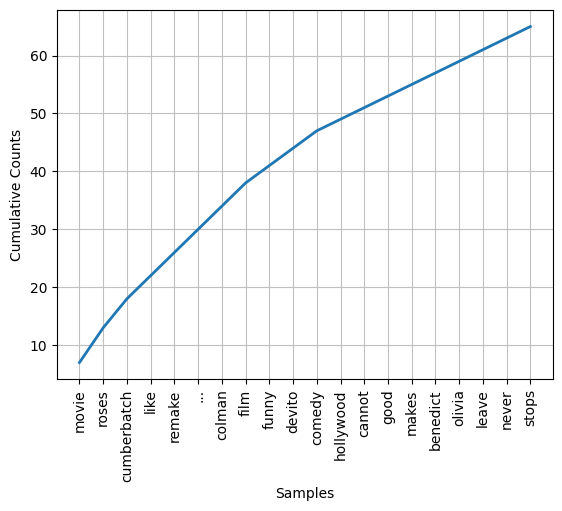

In [ ]:
from nltk import FreqDist

#  Build a single corpus from your normalized tokens (you already made tokens_clean in Q4)
corpus = [w for row in df['tokens_clean'] for w in row]

#  Frequency distribution (Lab 1.5)
fdist_reviews = FreqDist(corpus)

#  Plot the top 20 most frequent tokens
fdist_reviews.plot(20, cumulative=True)

